In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat, loadmat
from scipy import signal

#custom made functions
import utils
import functions as fn


### Run the model and produce Supplementary Fig 2

In [2]:
#Get w0, w1
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0) 

w0 = fn.getGabor(cm,sf0,theta,N,phase-np.pi,std)
A = np.sum(np.absolute(w0));w0 = w0/A

w1 = fn.getGabor(cm,sf0,theta,N,phase+np.pi/2,3*std)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw

###create the stimuli
sf = 3
stimDict = {}
stimDict[0] = 0.43*fn.gratingH(sf,N)
stimDict[1] = 0.43*fn.gratingV(sf,N)


#get the RFs for different stimuli and lamda values
RFDict = {}; stimInds = np.arange(2)
lamdas = [0, 1,10]; alpha = 0.2

for ind in stimInds:
    stim = stimDict[ind]
    for lamda in lamdas:
        
        RFDict[(ind,lamda)],vout = fn.computeRF(stim,w0,w1, lamda, alpha)

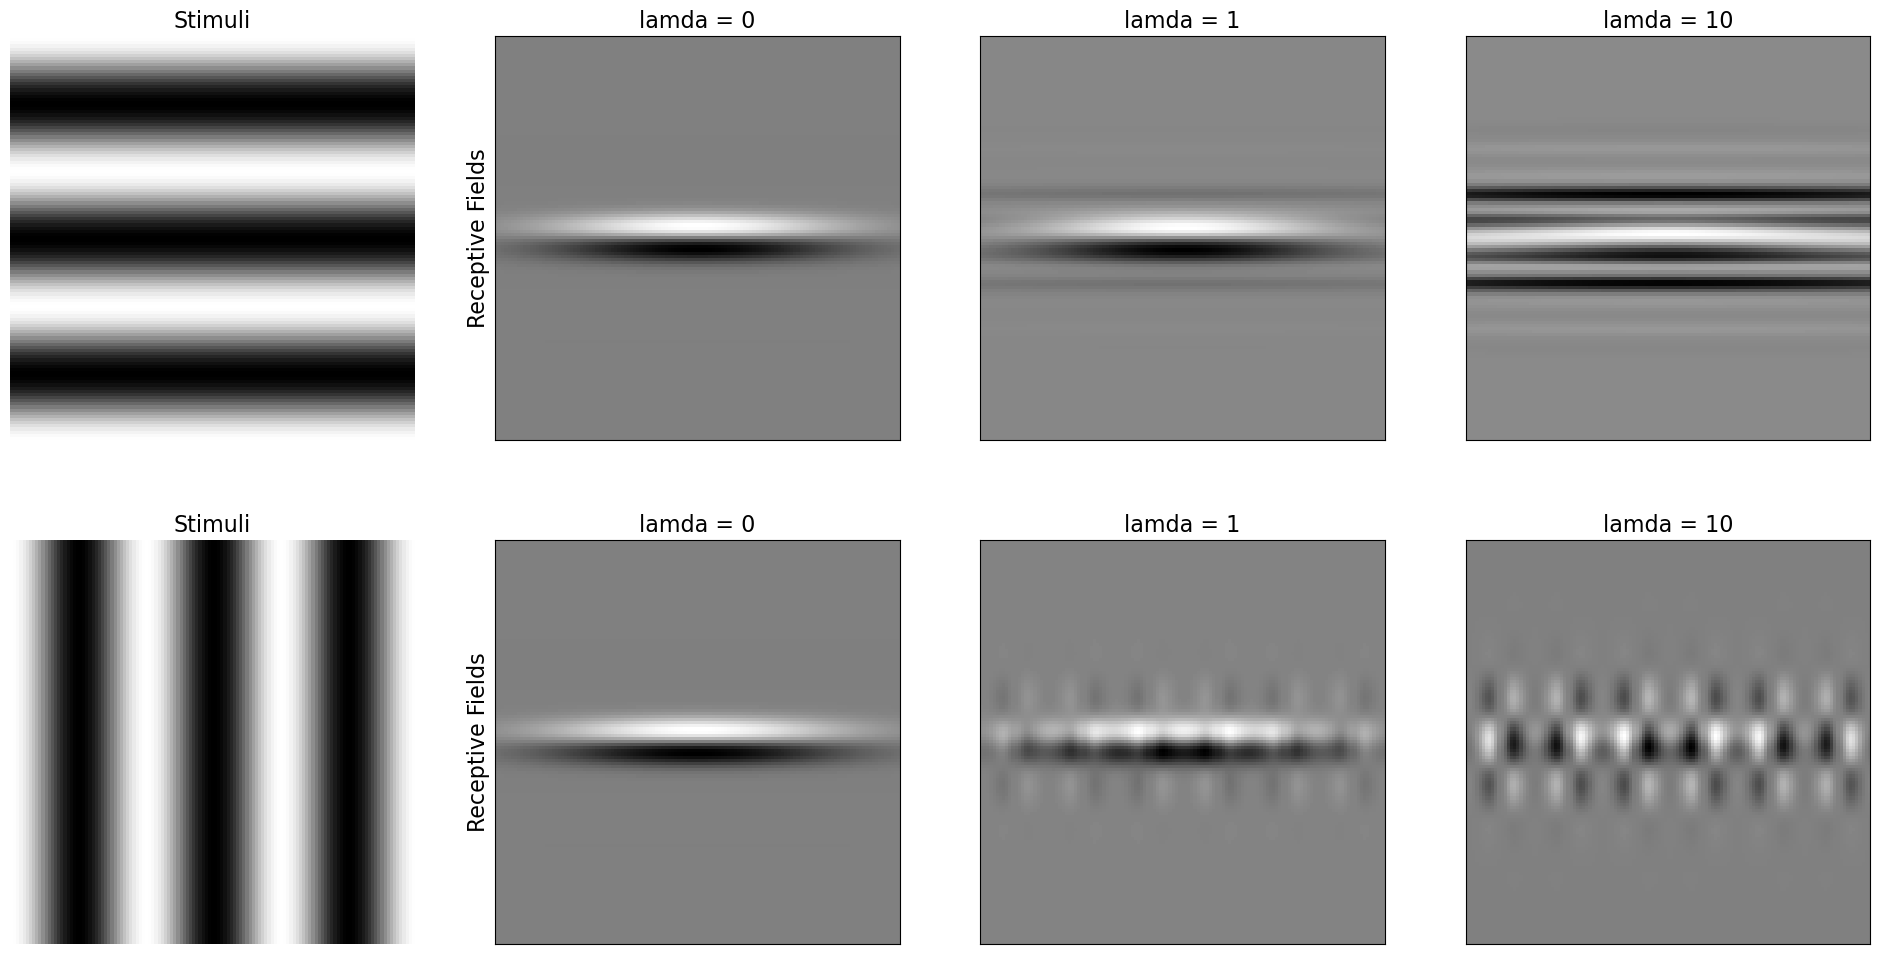

In [3]:
plt.rcParams['figure.figsize'] = [24,12]  

for ind in stimInds:
    stim = stimDict[ind]
    plt.subplot(len(stimInds),len(lamdas)+1,(ind*(len(lamdas)+1))+1)
    plt.title('Stimuli',fontsize=16)
    plt.imshow(stim,cmap='gray')
    plt.axis('off') 
    for indL,lamda in enumerate(lamdas):
        plt.subplot(len(stimInds),len(lamdas)+1,(ind*(len(lamdas)+1))+indL+2)
        ttl = 'lamda = '+ str(lamda)
        plt.title(ttl, fontsize=16)

        plt.imshow(RFDict[(ind,lamda)],cmap='gray')
        if indL == 0:
            plt.ylabel('Receptive Fields',fontsize=16)
        plt.xticks([])
        plt.yticks([])
        
#plt.savefig('data/__SupRF1.eps', format='eps', dpi=100)        
plt.show()

### Run the model and produce Supplementary Fig 3

In [4]:
#Get w0, w1
cm = 1.0; N = 129; sf0 = 4/N; theta = 0; phase = 0.0; std = 1/(8*sf0);gamma = 0.5


w0 = fn.getGabor(cm,sf0,theta,N,phase-np.pi,std,gamma=gamma)
A = np.sum(np.absolute(w0));w0 = w0/A
maxW0 = np.max(w0); M = 1.0*(np.absolute(w0) > 0.1*maxW0)
w0 = w0*M

w1 = fn.getGabor(cm,sf0,theta,N,phase-np.pi/2,3*std,gamma=gamma)
Aw = np.sum(np.absolute(w1));w1 = w1/Aw


#Get stimuli

stimDict = {}
gamma = 0.5
stim = fn.getGabor(cm,sf0,theta,N,phase+np.pi,std,gamma=gamma)
stimDict[0] = 0.43*M*(stim/np.max(stim))

gamma = 0.125
stim = fn.getGabor(cm,sf0,theta,N,phase+np.pi,std,gamma=gamma)
stimTemp = 0.43*(stim/np.max(stim))

stimDict[1] = (1-M)*(stimTemp - stimDict[0])
stimDict[2] = stimDict[1]+stimDict[0]

#Get RFs for different combinations of lamda and stimuli
RFDict = {}; srDict = {}
lamdas = [0, 1]
stimInds = np.arange(3)
alpha = 0.2

for ind in stimInds:
    stim = stimDict[ind]
    for lamda in lamdas:
        
        RFDict[(ind,lamda)],vout = fn.computeRF(stim,w0,w1, lamda, alpha)
        srDict[(ind,lamda)] = fn.ReLU(vout)

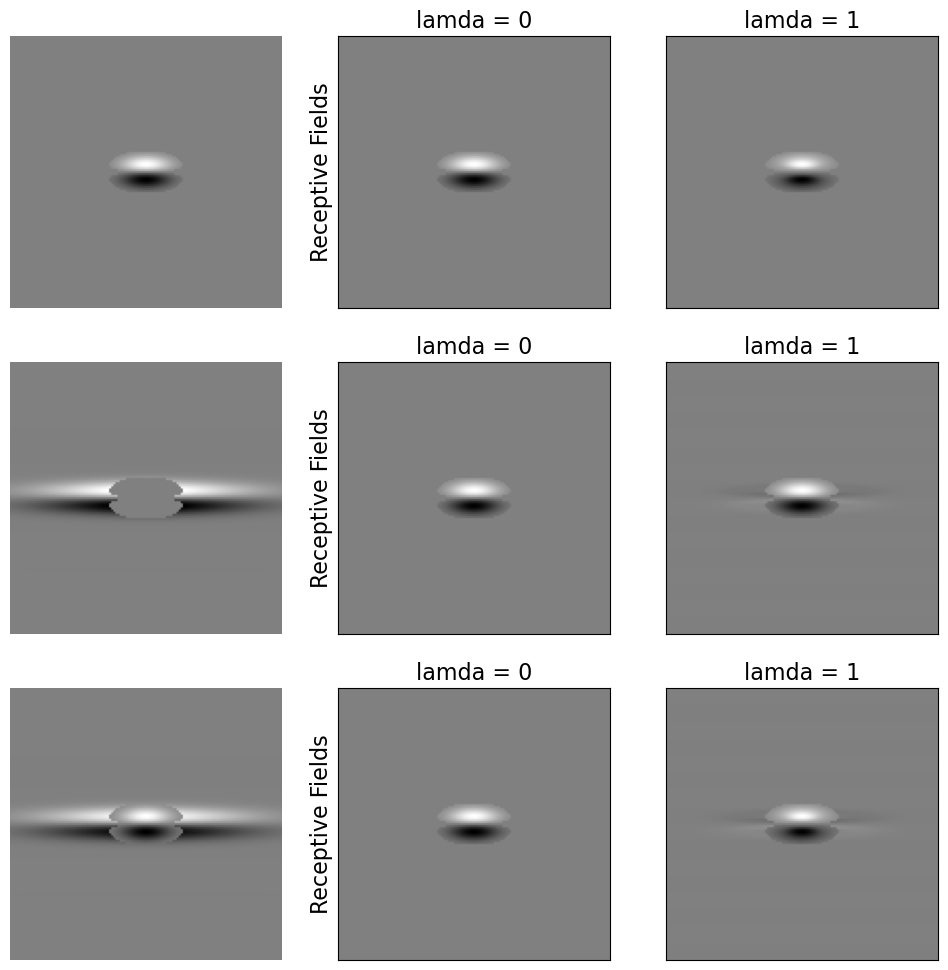

In [5]:
plt.rcParams['figure.figsize'] = [12,12]  

for ind in stimInds:
    stim = stimDict[ind]
    plt.subplot(len(stimInds),len(lamdas)+1,(ind*(len(lamdas)+1))+1)
    plt.imshow(stim,cmap='gray')
    plt.axis('off') 
    for indL,lamda in enumerate(lamdas):
        plt.subplot(len(stimInds),len(lamdas)+1,(ind*(len(lamdas)+1))+indL+2)
        ttl = 'lamda = '+ str(lamda)
        plt.title(ttl,fontsize=16)
        plt.imshow(RFDict[(ind,lamda)],cmap='gray')
        if indL == 0:
            plt.ylabel('Receptive Fields',fontsize=16)
        plt.xticks([])
        plt.yticks([])
        
#plt.savefig('data/supextraRF1.eps', format='eps', dpi=100)        
plt.show()

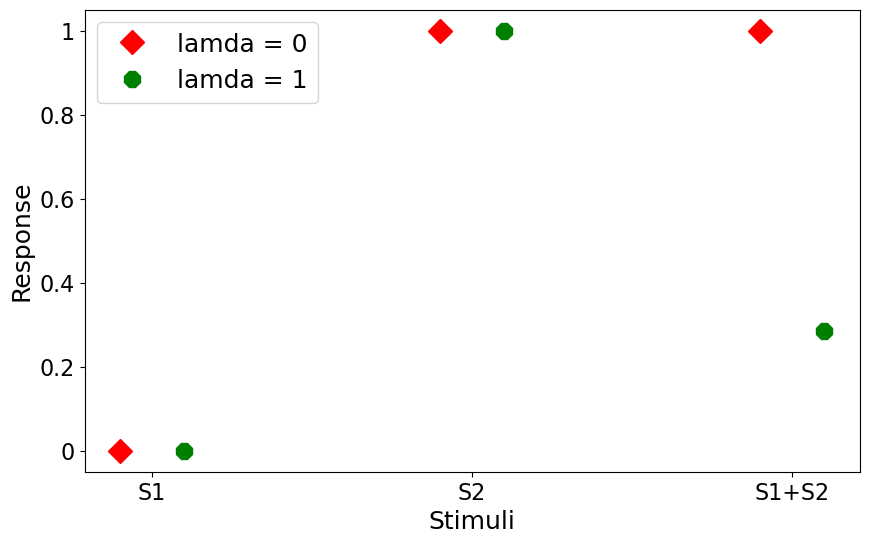

In [6]:
# 1st point is for stimulus with the sides (zero response), 2nd point is for optimally sized stimulus, 
#3rd for enlongated stimulus


fig = plt.figure(figsize=(10,6))

orderInd = [1,0,2]
lamdas = [0,1]
sp = {}

for lmd in lamdas:
    
    sp[lmd] = np.zeros(len(orderInd))
    for ind,indOr in enumerate(orderInd):
        sp[lmd][ind] = srDict[(indOr,lmd)]
        
    sp[lmd] = sp[lmd]/sp[lmd][1]

xx = {}
xx[0] = np.array([0,1,2]) -0.1
xx[1] = xx[0] +2*0.1
colors = ['r','g']
markers = ["D","8"]
for ind,lmd in enumerate(lamdas):
    
    lbl = 'lamda = '+str(lmd)
    plt.plot(xx[ind],sp[lmd],color = colors[ind],marker = markers[ind],markersize=12,linestyle='None',label=lbl)
    plt.xticks(np.arange(0, 3), ['S1','S2','S1+S2'],fontsize=16)
    plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1] ,fontsize=16)

    plt.ylabel('Response',fontsize=18)
    plt.xlabel('Stimuli',fontsize=18)
    plt.legend(loc='upper left',fontsize=18)



#plt.savefig('data/__SupextraRF2.eps', format='eps', dpi=100)        
plt.show()
